<a href="https://colab.research.google.com/github/leticiatdoliveira/GAN-getting-started/blob/main/10101_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

**Goal:** Create a GAN capable of generating the 10101 pattern.

**Source:** This problem is from Educative website course.

# Requirements

In [71]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Discriminator class


In [5]:
class Discriminator(nn.Module):
  def __init__(self):
    # init parent class
    super().__init__()

    # define network architecture
    self.model = nn.Sequential(
        nn.Linear(5,4),
        nn.Sigmoid(),

        nn.Linear(4,1),
        nn.Sigmoid()
    )

    # define loss function
    self.loss_function = nn.MSELoss()

    # define optimizer
    self.optmimizer = torch.optim.SGD(self.parameters(), lr=0.01)

    # progress variables
    self.counter = 0
    self.progress = []
    self.step_progress_save = 10
    self.step_progress_print = 10000

    pass


  def forward(self,x):
    return self.model(x)


  def train(self,inputs,targets):
    # predict output
    outputs = self.forward(inputs)

    # calculate loss between predictions and real output values
    loss = self.loss_function(outputs,targets)

    # zero gradients, perform backward pass, update weights
    self.optmimizer.zero_grad()
    loss.backward()
    self.optmimizer.step()

    # update progress
    self.counter += 1
    if (self.counter % self.step_progress_save == 0):
      self.progress.append(loss.item())
    if (self.counter % self.step_progress_print == 0):
      print(f'Loss at step {self.counter}: {loss.item()}')

    pass

  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1),
            figsize=(16,8),
            alpha=0.1,
            marker='.',
            grid=True,
            yticks=(0,0.25,0.))

In train method:
- We must clean the gradients calculated from previous training step [```self.optmimizer.zero_grad()```]
- We must compute the gradients to current loss [```loss.backward()```]
  - It calculates how much each parameter contributes to the loss
- We must updated the model parameters within the new gradient calcul [```self.optmimizer.step()```]

## Checking Discriminator output

In [6]:
D = Discriminator()

In [9]:
real_tensor = torch.Tensor([1,0, 1, 0, 1])
print(f"Real tensor: {real_tensor}")

Real tensor: tensor([1., 0., 1., 0., 1.])


In [11]:
print(f"Discriminator output for real_tensor: {D.forward(real_tensor)}")

Discriminator output for real_tensor: tensor([0.3851], grad_fn=<SigmoidBackward0>)


In [13]:
fake_tensor = torch.Tensor([0,1, 0, 1, 0])
print(f"Fake tensor: {fake_tensor}")

Fake tensor: tensor([0., 1., 0., 1., 0.])


In [14]:
print(f"Discriminator output for fake_tensor: {D.forward(fake_tensor)}")

Discriminator output for fake_tensor: tensor([0.3655], grad_fn=<SigmoidBackward0>)


Comparing the output prediction for both real and fake data, we observe model didn't learn to classify the data. That's normal, because we have not performed yet a tranning process, to teach model what data is real and what isn't

### Training model

In [24]:
epochs = 10000

In [25]:
print(f"Training model in {epochs} epochs...")
for ep in range(epochs):
  # train real data
  D.train(real_tensor, torch.FloatTensor([1.0]))

  # train fake data
  D.train(fake_tensor, torch.FloatTensor([0.0]))

  pass
print("> Training finished")

Training model in 10000 epochs...
Loss at step 10000: 0.007429426535964012
Loss at step 20000: 0.0025413851253688335
> Training finished


In [23]:
# test for 1000 epochs
print(f"Discriminator output for real_tensor: {D.forward(real_tensor).item()}")
print(f"Discriminator output for fake_tensor: {D.forward(fake_tensor).item()}")

Discriminator output for real_tensor: 0.6512172818183899
Discriminator output for fake_tensor: 0.32489943504333496


In [26]:
# test for 10000 epochs
print(f"Discriminator output for real_tensor: {D.forward(real_tensor).item()}")
print(f"Discriminator output for fake_tensor: {D.forward(fake_tensor).item()}")

Discriminator output for real_tensor: 0.9517439007759094
Discriminator output for fake_tensor: 0.04629473388195038


In [28]:
new_tensor = torch.FloatTensor([1,0,1,0,0])
print(f"Discriminator output for real_tensor: {D.forward(new_tensor).item()}")

Discriminator output for real_tensor: 0.8961536288261414


In [29]:
new_tensor = torch.FloatTensor([1,0,1,1,1])
print(f"Discriminator output for real_tensor: {D.forward(new_tensor).item()}")

Discriminator output for real_tensor: 0.8942007422447205


In [30]:
new_tensor = torch.FloatTensor([1,0,0,0,1])
print(f"Discriminator output for real_tensor: {D.forward(new_tensor).item()}")

Discriminator output for real_tensor: 0.8983072638511658


If we look the results above, we conclue that model struggles to predict some new fake data, outcoming 89% probability to be a real data. It occured because we trained our model to define only [0., 1., 0., 1., 0.] as fake.

## Re-train model

We must re-train the model with random fake data possibilities

> use random method, it returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)

In [31]:
def generate_random(size):
  return torch.rand(size)

In [33]:
test_random_data = generate_random(3)
print(f"Testing random data generation: {test_random_data}")

Testing random data generation: tensor([0.0012, 0.1109, 0.2401])


To turn our code more modular, we can create a function to real data as well, instead of just write down the tensor in the train loop

In [34]:
def generate_real():
  return torch.FloatTensor([1, 0, 1, 0, 1])

In [35]:
test_real_data = generate_real()
print(f"Testing random data generation: {test_real_data}")

Testing random data generation: tensor([1., 0., 1., 0., 1.])


Now, let's retrain our model

In [41]:
D = Discriminator()

In [45]:
epochs = 10000

In [46]:
print(f"Training model in {epochs} epochs")
for i in range(epochs):
  # train real data
  D.train(generate_real(), torch.FloatTensor([1]))
  # train fake data
  D.train(generate_random(5),torch.FloatTensor([0]))
  pass

print(f"> Training finished")

Training model in 10000 epochs
Loss at step 10000: 0.10451532155275345
Loss at step 20000: 0.00933003332465887
> Training finished


In [47]:
print(f"Discriminator output for real_tensor: {D.forward(real_tensor).item()}")
print(f"Discriminator output for fake_tensor: {D.forward(fake_tensor).item()}")

Discriminator output for real_tensor: 0.886812686920166
Discriminator output for fake_tensor: 0.006797850131988525


If we compare the current results with the previous, our model is a little bit less confident about the real data (95% -> 89%), but more confident about the fake as fake (4% -> 0.6%).

It makes completely sense, as we have incresead the fake possibilites, our model generalizes more, thus the real data performance can present some slight decrease.

In [48]:
new_tensor = torch.FloatTensor([1,0,1,0,0])
print(f"Discriminator output for real_tensor: {D.forward(new_tensor).item()}")

Discriminator output for real_tensor: 0.682695209980011


In [49]:
new_tensor = torch.FloatTensor([1,0,1,1,1])
print(f"Discriminator output for real_tensor: {D.forward(new_tensor).item()}")

Discriminator output for real_tensor: 0.31727534532546997


In [50]:
new_tensor = torch.FloatTensor([1,0,0,0,1])
print(f"Discriminator output for real_tensor: {D.forward(new_tensor).item()}")

Discriminator output for real_tensor: 0.6786484122276306


These tests with some others fake data emphasis how the model have improved performance in detecting fake data

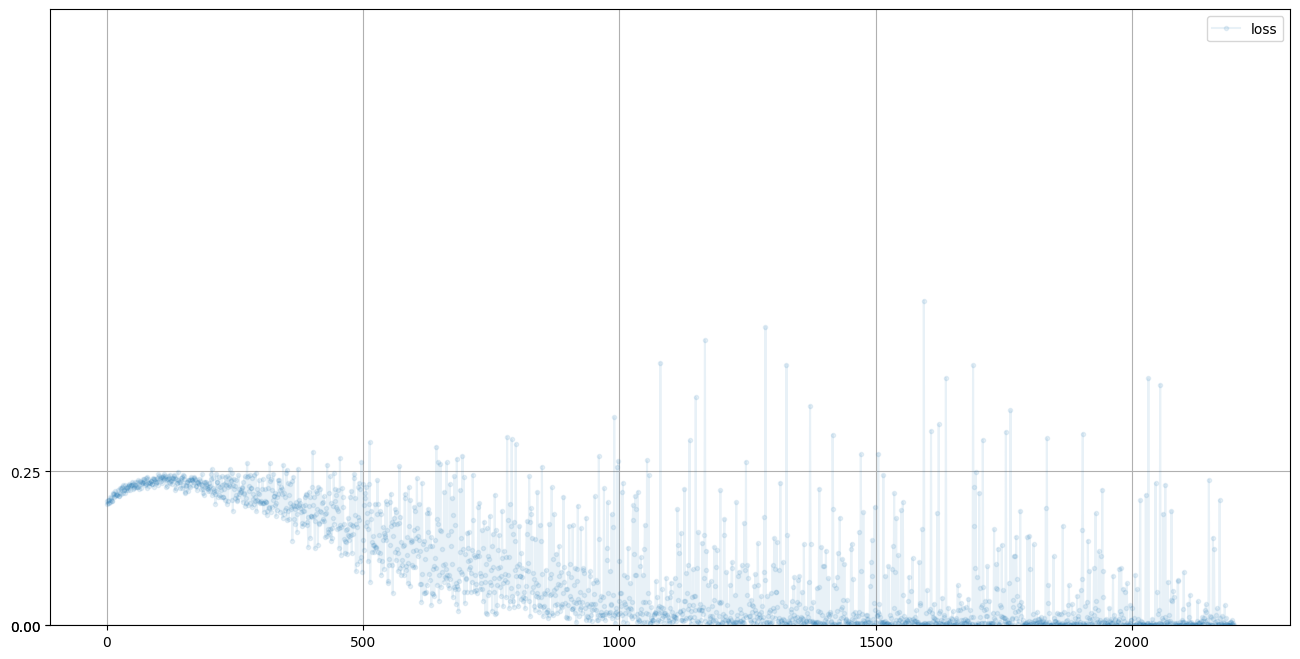

In [53]:
D.plot_progress()

# Generator class

In [59]:
class Generator(nn.Module):
  def __init__(self):
    # init parent class
    super().__init__()

    # define network architecture
    self.model = nn.Sequential(
        nn.Linear(1,4),
        nn.Sigmoid(),

        nn.Linear(4,5),
        nn.Sigmoid()
    )

    # define optimizer
    self.optmimizer = torch.optim.SGD(self.parameters(), lr=0.01)

    # progress variables
    self.counter = 0
    self.progress = []
    self.step_progress_save = 10
    self.step_progress_print = 10000

    pass


  def forward(self,x):
    return self.model(x)


  def train(self, D ,inputs,targets):
    # calculate the generator outputs
    g_outputs = self.forward(inputs)

    # pass generator outputs onto Discriminator
    d_outputs = D.forward(g_outputs)

    # calculate error from d_outputs
    loss = D.loss_function(d_outputs, targets)

    # zero gradients, perform backward pass, update weights
    self.optmimizer.zero_grad()
    loss.backward()
    self.optmimizer.step()

    # update progress
    self.counter += 1
    if (self.counter % self.step_progress_save == 0):
      self.progress.append(loss.item())

    pass

  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1),
            figsize=(16,8),
            alpha=0.1,
            marker='.',
            grid=True,
            yticks=(0,0.25,0.))

## Checking Generator output

In [60]:
G = Generator()

In [61]:
data_generated = G.forward(torch.FloatTensor([0.5]))

In [63]:
print(f"Generated data: {data_generated}")

Generated data: tensor([0.5755, 0.4349, 0.5307, 0.3982, 0.2885], grad_fn=<SigmoidBackward0>)


The generator works well ! It have created a tensor with 5 elements. Don't worry about the values now, we haven't trained the generator yet

#Main script

We have created and tested the Discriminator and Generator. Now, we'll train our GAN ! Thus, we'll train them against each other!

In [64]:
D = Discriminator()
G = Generator()

In [65]:
real_output = torch.FloatTensor([1])

In [66]:
fake_output = torch.FloatTensor([0])

In [68]:
generator_input = torch.FloatTensor([0.5])

In [67]:
epochs = 10000

In [69]:
print(f"Training GAN on {epochs} epochs")
for ep in range(epochs):
  # train Discriminator on real data
  D.train(generate_real(), real_output)

  # train Discriminator on generated data
  # use detach() so gradients in G are not calculated
  D.train(G.forward(generator_input).detach(), fake_output)

  # train Generator
  G.train(D, generator_input, real_output)

  pass


print(f"GAN training finished")

Training GAN on 10000 epochs
Loss at step 10000: 0.1792912483215332
Loss at step 20000: 0.23421044647693634
GAN training finished


Text(0.5, 0, 'Discriminator loss chart')

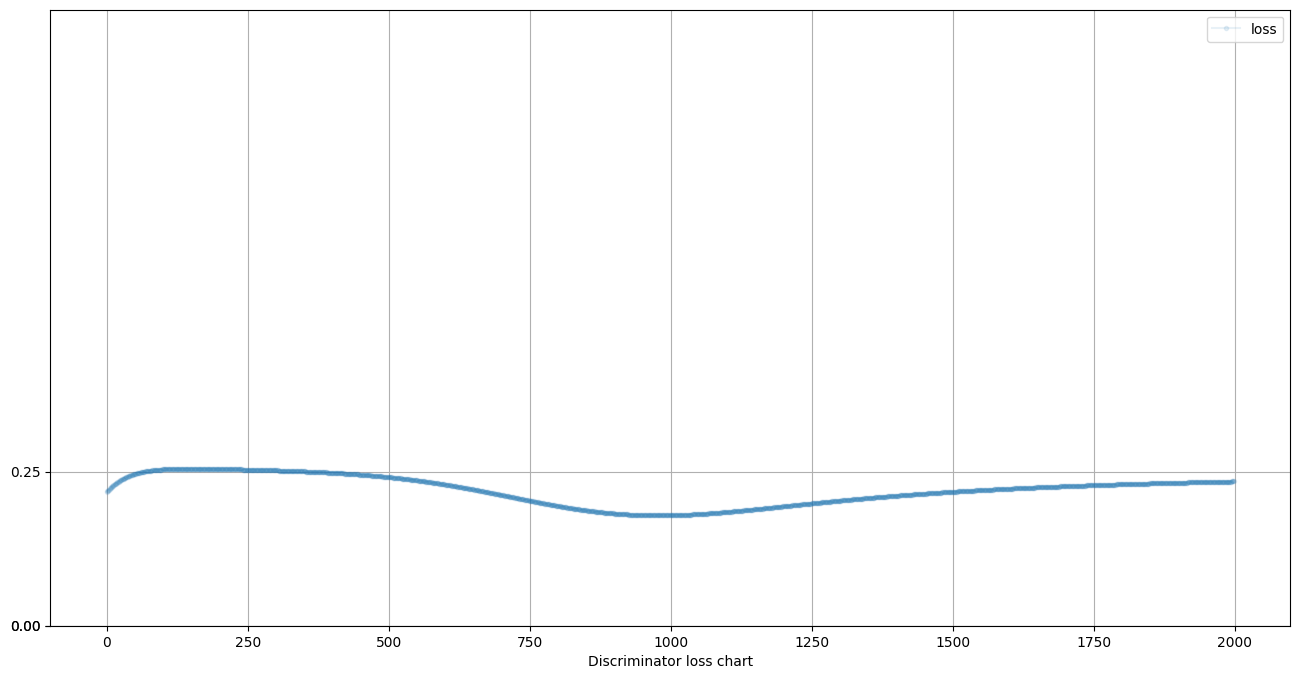

In [72]:
D.plot_progress()
plt.xlabel('Discriminator loss chart')

Text(0.5, 0, 'Generator loss chart')

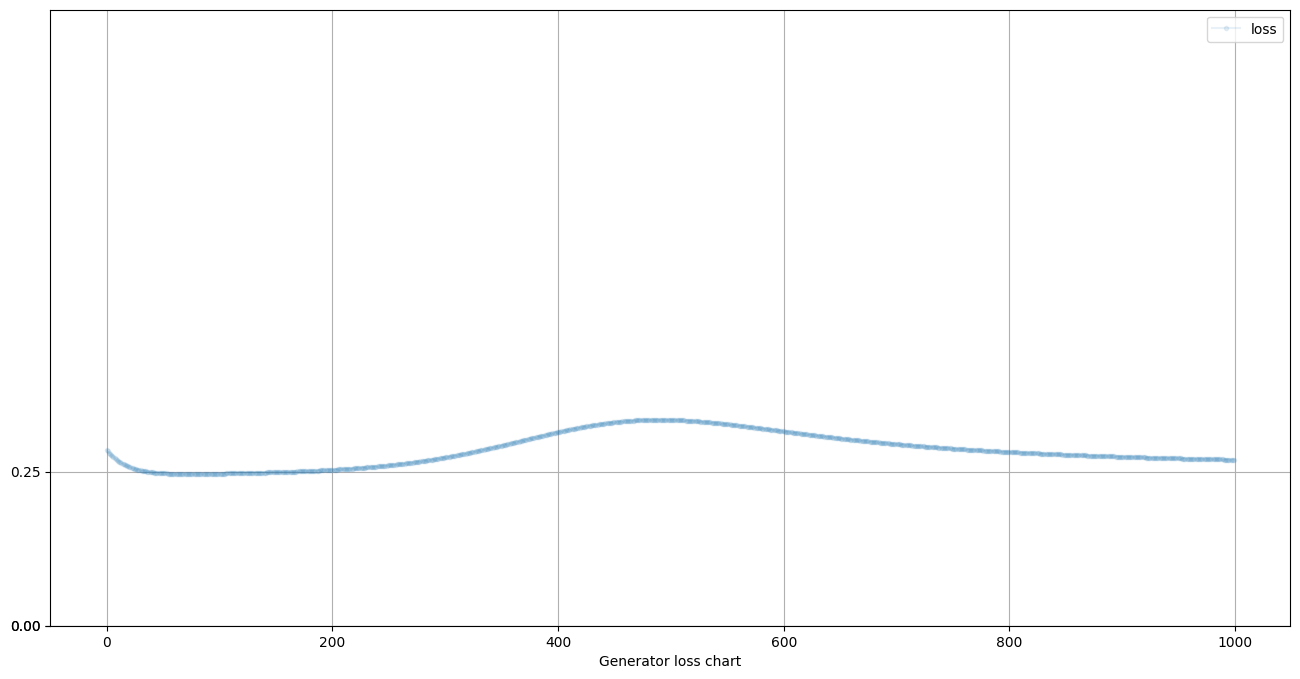

In [73]:
G.plot_progress()
plt.xlabel('Generator loss chart')

Let's see what pattern the Generator creates now that we have trained it

In [74]:
data_generated = G.forward(torch.FloatTensor([0.5]))
print(f"Generated data: {data_generated}")

Generated data: tensor([0.9583, 0.0234, 0.9596, 0.0191, 0.9651], grad_fn=<SigmoidBackward0>)


The data created corresponds well to our target pattern (10101)

# Conclusion

A successfully trained GAN has a discriminator that can’t tell real from generated data. Its output is 0.5, half way between 0.0 and 1.0. The ideal mean squared error loss is 0.25.

> Back to the loss charts, we conclude that our GAN works pretty well, with its loss close to 0.25